In [1]:
import pandas as pd
from pylab import rcParams
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from pandas_profiling import ProfileReport
from geopy import distance
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

## Бизнес задача:
Исходные данные: В наличии имеется сборный датасет вин с различными показателями, часть значений при объединении упущено.
Цель: найти набор ключевых показателей позволяющих предсказать качество вина('quality') 


## Решение задачи WineQuality в рамках методологии CrispDM


    1. Сбор справочной информации:
        - Бизнес-фон: Огромное количество производителей вин существенно усложняют и удлинняют процесс отбора и оценки вин.
        - Бизнес-цель: Быстрая и точная оценка качества и классификация вин.
        - Критерии успеха: Внедрение модели  (точность > 90%) позволяющее проводить оценку и классификацию вин через web-сервис            компании, что позволит поднять продажи на 4%
        
    2. Имеющиеся данные:
        - В наличии имеется сборный датасет вин с различными показателями:
        
                        - тип вина white/red
                        - Титируемая (постаянная) кислотность [fixed acidity] - Сумма содержащихся в сусле и вине кислот и их                              кислых солей
                        - Летучая кислотность [volatile acidity] – характеризует здоровье виноматериалов.
                          Летучая кислотность возрастает при окислении вина и в результате микробиальных заболеваний.
                        - Лимонная кислота[citric acid]
                        - Постаянный сахар [residual sugar]
                        - Хлориды [chlorides]
                        - Свободный диоксид серы [free sulfur dioxide]
                        - Общий уровень диоксида серы [total sulfur dioxide]
                        - Плотность [density]	
                        - Уровень кислотности [pH]	
                        - Уровень сульфатов [sulphates]	
                        - Уровень алкоголя [alcohol]	
                        - Качество вина [quality]
                        
            
            
        - Качество данных: дата сет имеет пропуски и выбросы, требуется очистка данных и создание новых признаков.
          Пропуски в следующих показателях:
                                fixed acidity           10
                                volatile acidity         8
                                citric acid              3
                                residual sugar           2
                                chlorides                2
                                pH                       9
                                sulphates                4
        
            что на составляет 0.53%  данные могут быть отброшены без существенного ущерба для модели
            Категориальные данные тип вина [type] необходимо перевести к вещественным 0-красное, 1- белое и рассматривать вина в             разрезе типа вина
    3. Работа по загрузке и выборке данных очистке данных и генерации новых признаков:
    
        

In [41]:
l_encoding = preprocessing.LabelEncoder()

w_df = pd.read_csv('winequalityN.csv')
w_df.dropna(inplace=True)


w_df['w_type'] = l_encoding.fit_transform(w_df.type)
w_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,w_type
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [63]:
w_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,w_type
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505,0.753520
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286,0.430995
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


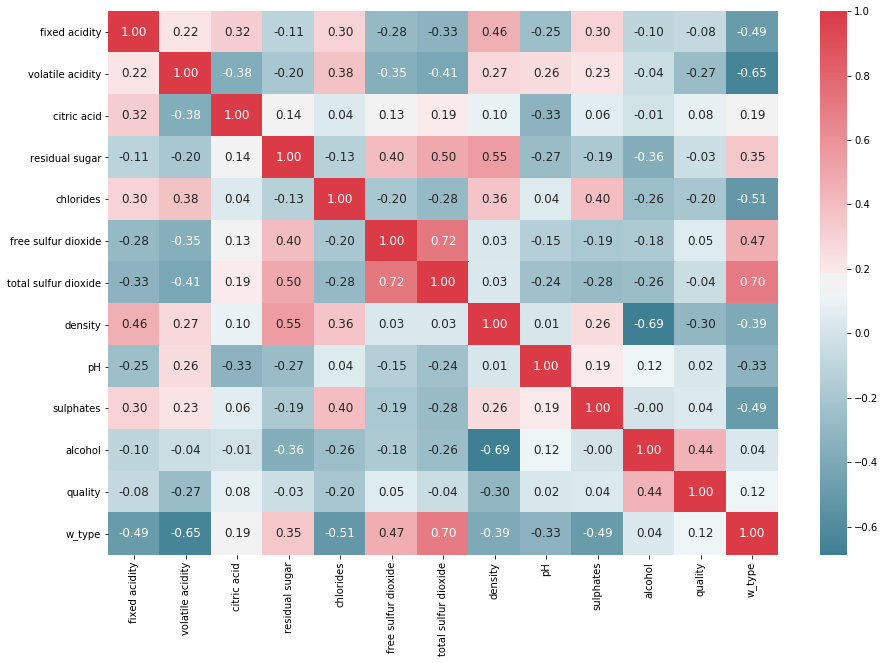

In [42]:
sns.heatmap(w_df.corr(), annot=True, annot_kws={"size": 12},cmap=sns.diverging_palette(220, 10, as_cmap=True),fmt=".2f")

C:\Users\Prozo\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\Prozo\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



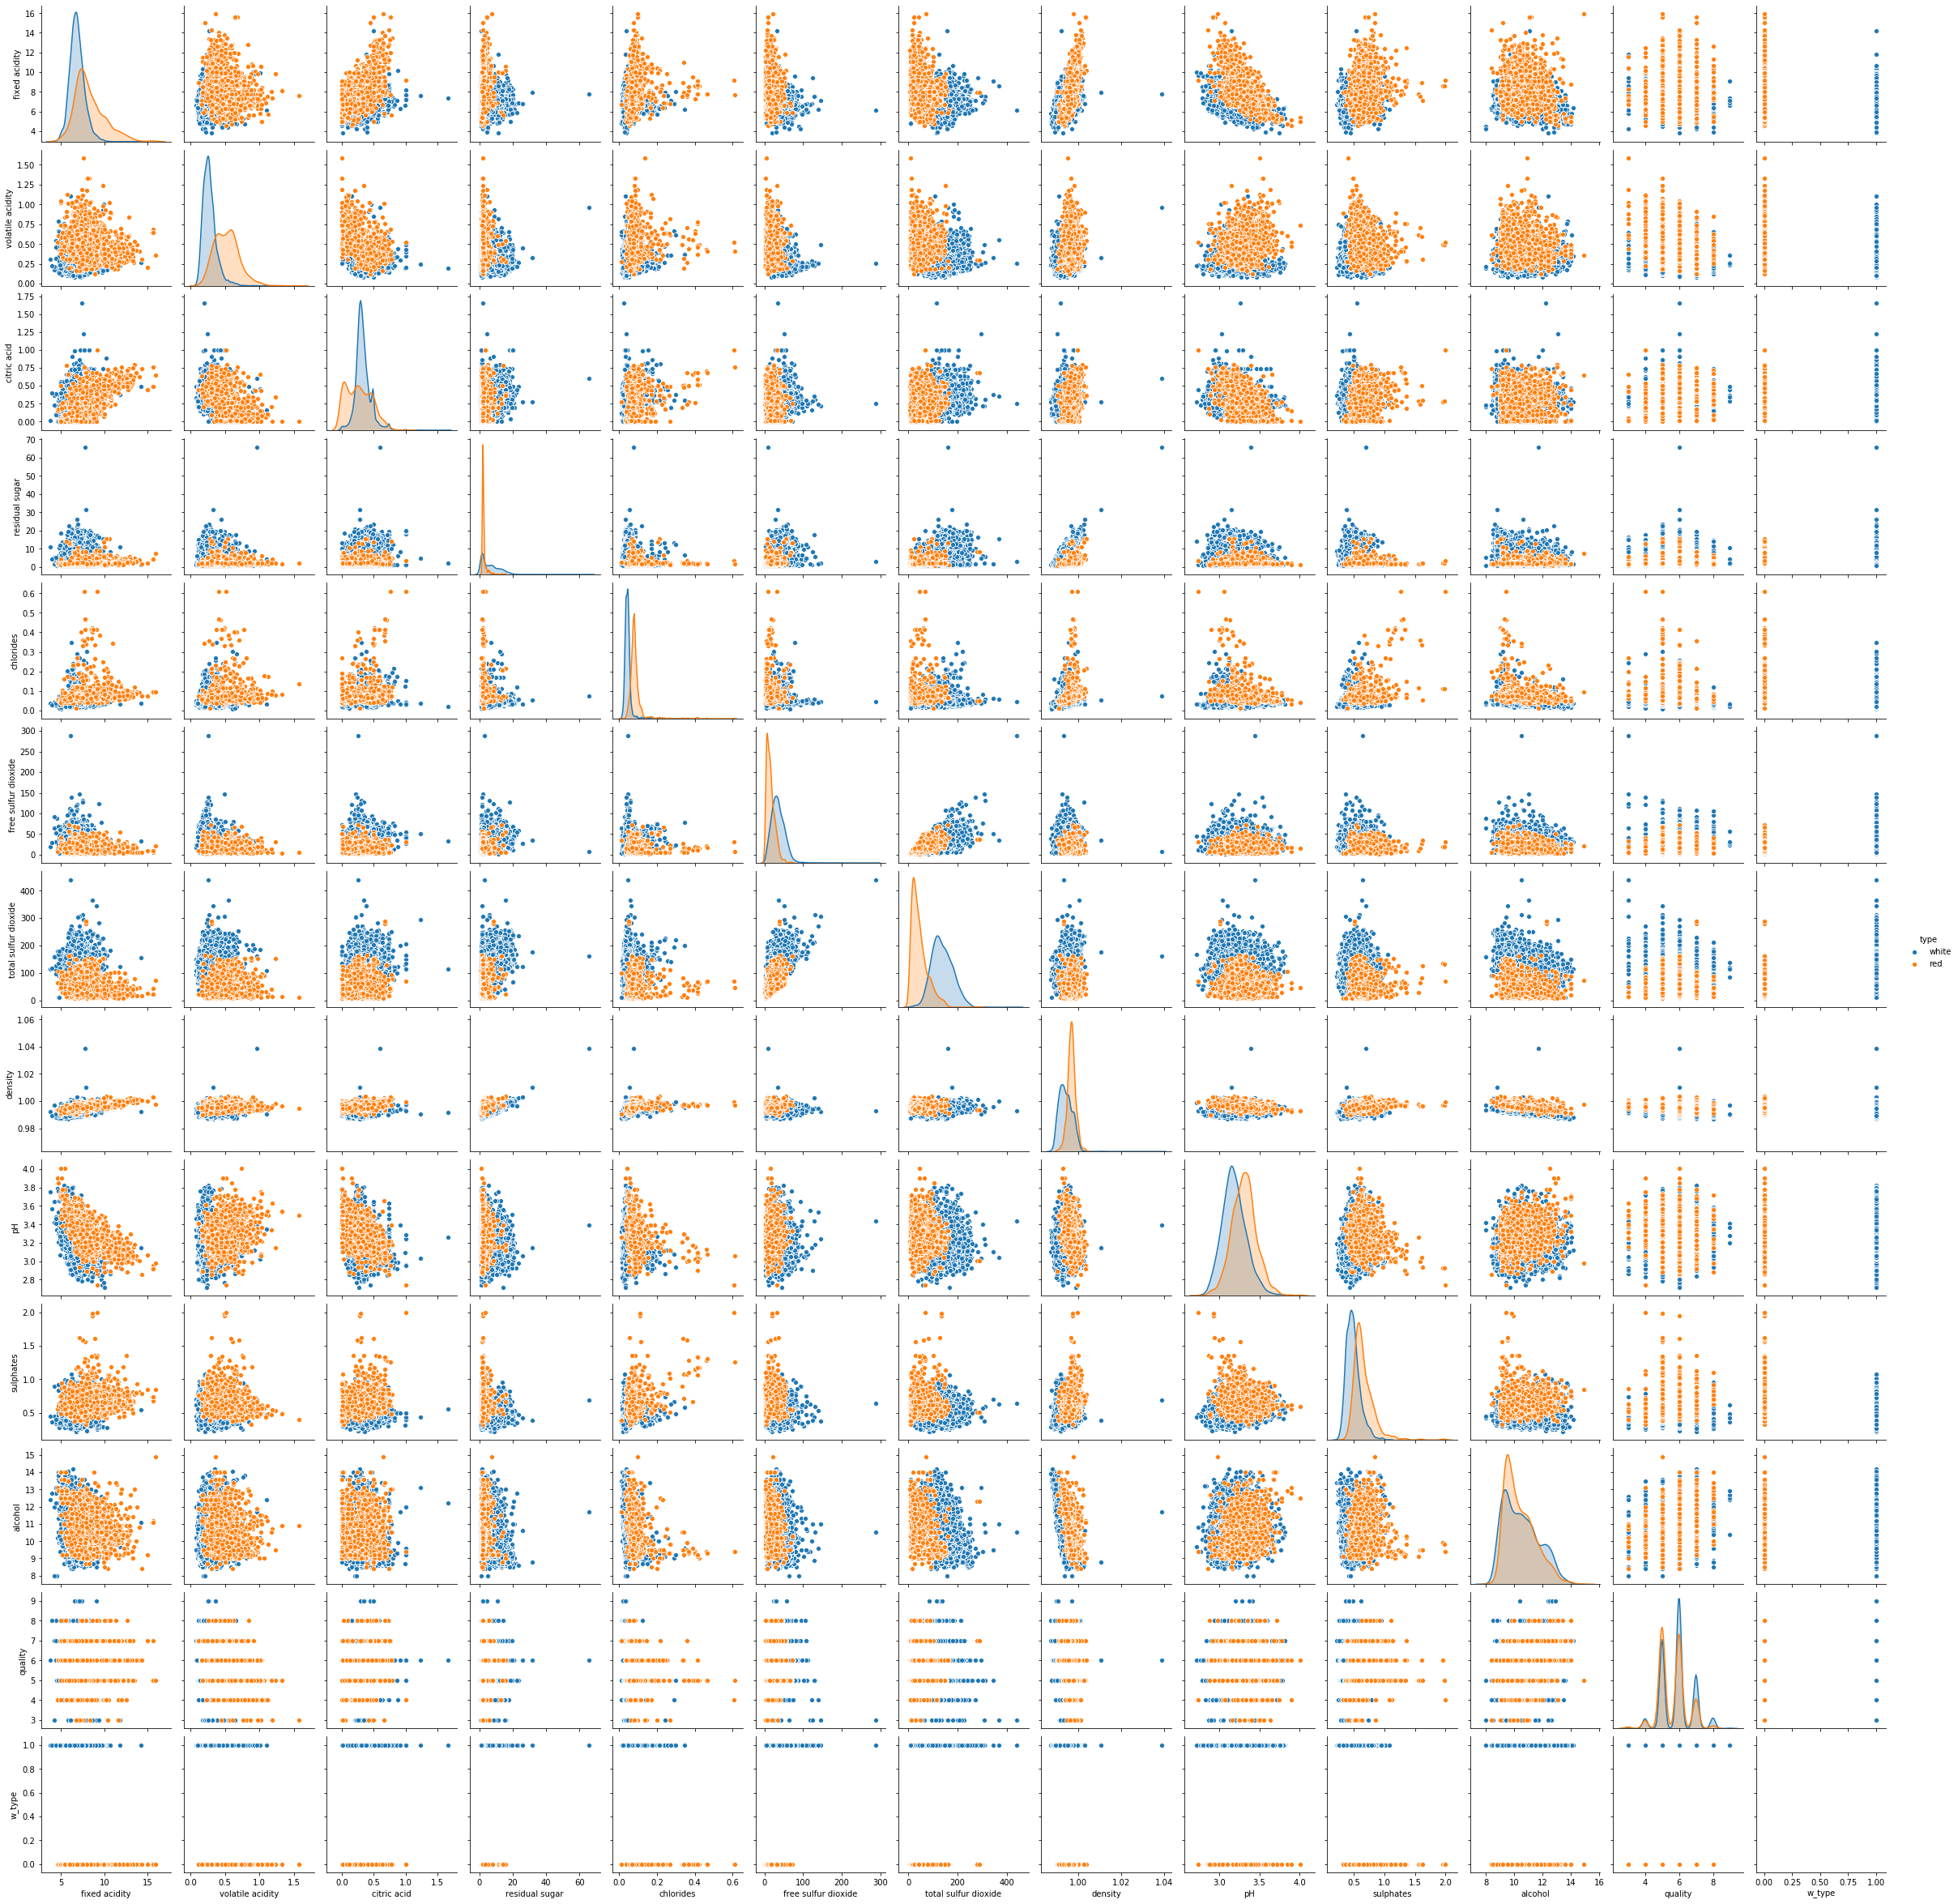

In [51]:
sns.pairplot(w_df, hue='type')

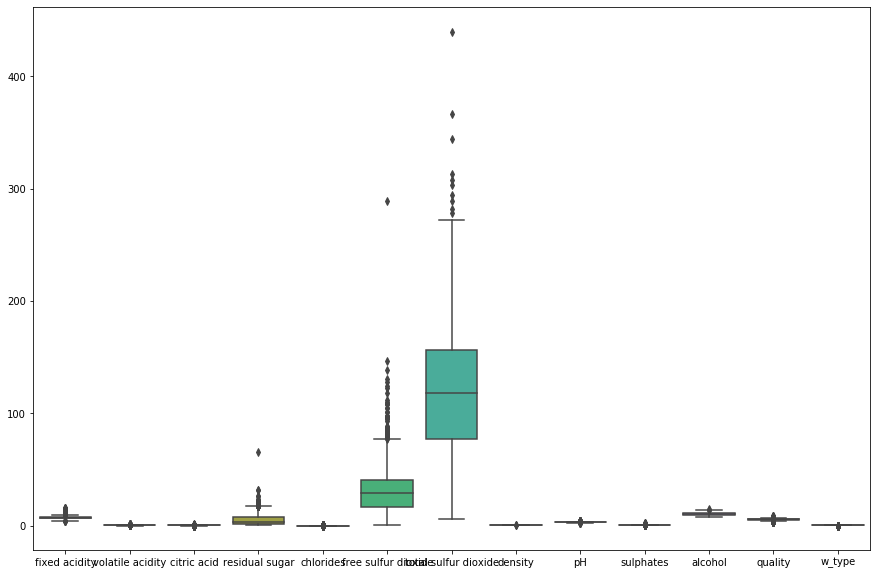

In [64]:
sns.boxplot(data=w_df)

In [80]:
w_df= w_df.drop('type',axis=1)
w_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,w_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


#### 4. Подготавливаем модель:
 - выбираем алгоритм: я хочу попробовать применить RandomForest.
 - делим группу на train 80% и тест 20%.
 - проводим обучение и тестирование.
 - получаем результат работы модели на тестовых данных приемлемым считаем  >95%
 

In [101]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(w_df, test_size=0.2)

ytrain = train['quality']
xtrain = train.drop('quality', axis=1)
ytest = test['quality']
xtest = test.drop(['quality'],axis=1)

In [102]:
%%time
rf = RandomForestClassifier(n_estimators=100,bootstrap = True,max_features = 'sqrt')
rf.fit(xtrain, ytrain)
tra_score=rf.score(xtrain, ytrain)
print('Training acc:', round(tra_score*100, 2), '%')

Training acc: 100.0 %
Wall time: 689 ms


In [103]:
predictions = rf.predict(xtest)
# Calculate the absolute errors
errors = abs(predictions - ytest)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
#Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Точность предсказания:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.37
Точность предсказания: 93.34 %.


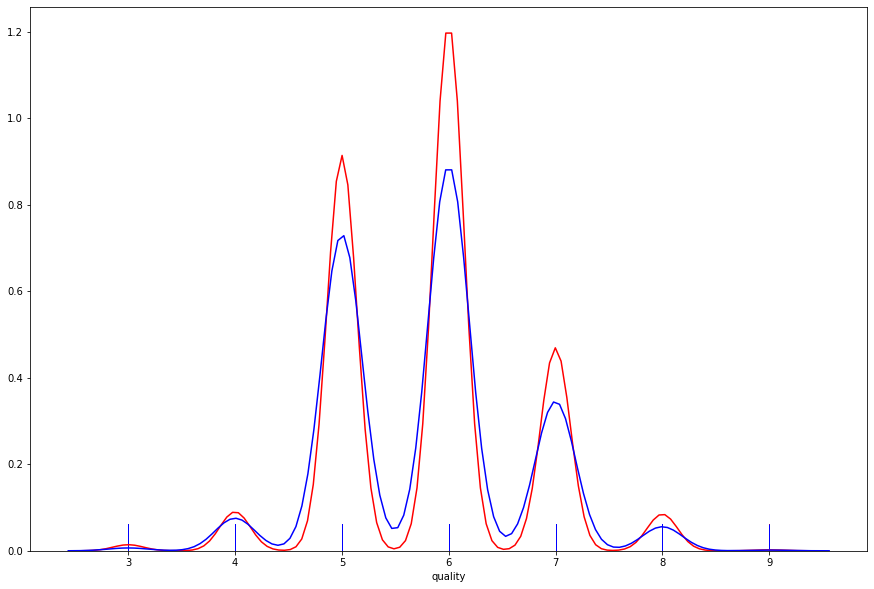

In [131]:
sns.distplot(ytrain, hist=False, rug=True, color="r")
sns.distplot(ytest, hist=False, rug=True, color="b")

#### 5. Оцениваем результаты, и предполагаем дальнейшие этапы по встраиванию модели

-по результатам тестирования сформирована предсказательная модель позволяющая предсказывать качество вина по имеющимся параметрам с точностью 93% что выше чем целевые 90%.
- следующим этапом необходимо разработать web сервис позволяющий предугадывать оценку вина по собираемым от поставщиков параметрам кислотности, плотности и прочее.
- Несмотря на достигнутые 90% точности данная модель нуждается в доработке по очищению данных и поиске более подходящих  алгоритмов обучения.

#### 6. Планирование сроков и этапов разработки и внедрения сервиса.

Этапы дальнейшей работы: 
- разработка web сервиса.
- внедрение в бизнес единицу (допустим один магазин)
- контроль бизнес эффекта- повышение выручки (целевое значение 4%)
- проверка зависимости изменения % продаж от внедрения (а не от других причин) 
- оптимизация модели доведение точности до 97%



- и так по кругу много раз....